In [3]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from mplsoccer.pitch import Pitch

Home or Away?away
Minimum number of passes?3


Text(0.97, 0.95, 'Thicker Lines - More Passes\nBigger Circles - More involvement')

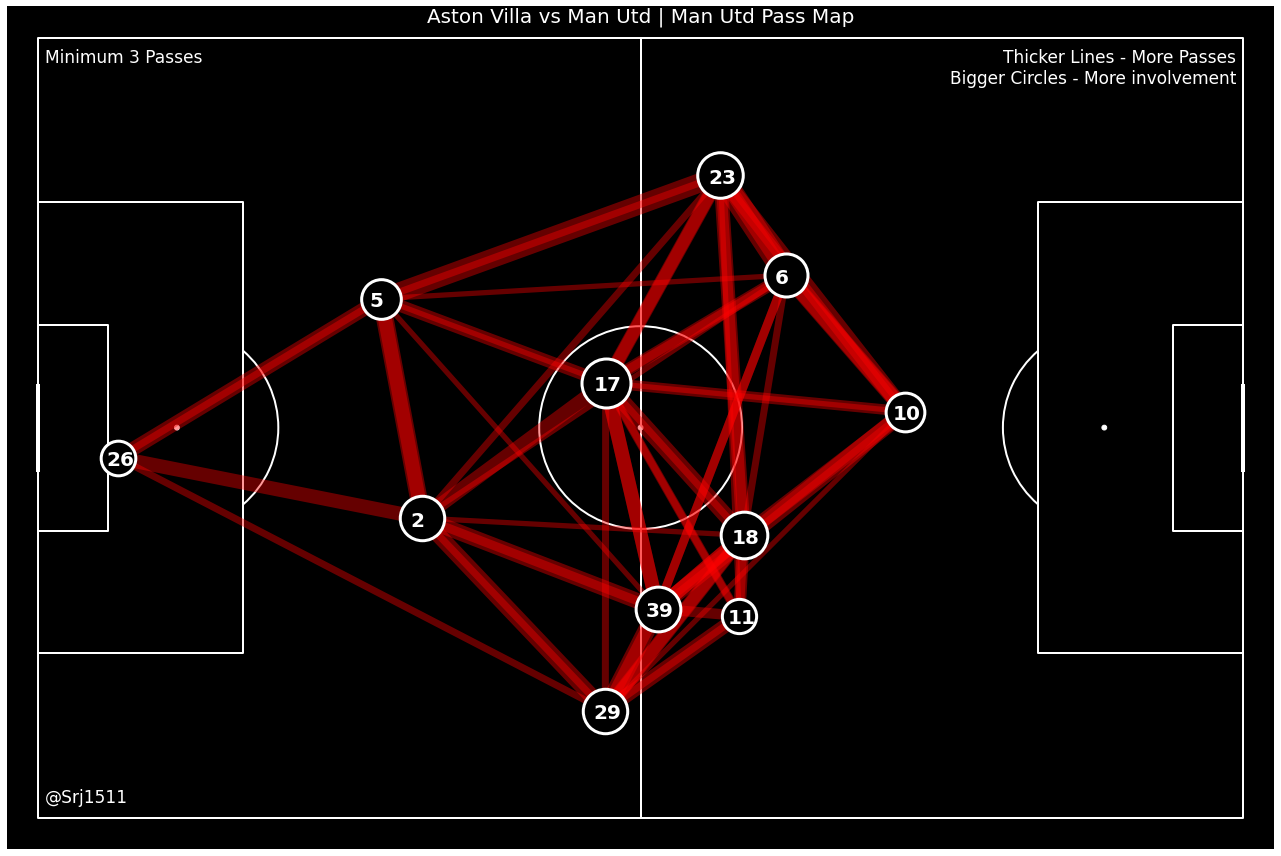

In [7]:
with open (DATA_PATH) as f:
    data = json.load(f)
    
h_o_a = str(input("Home or Away?"))
t_id = data[h_o_a]['teamId']

home_side = data['home']['name']
away_side = data['away']['name']

if h_o_a == 'home':
    header = home_side + ' vs ' + away_side + ' | ' + home_side + ' Pass Map'
    
else:
    header = home_side + ' vs ' + away_side + ' | ' + away_side + ' Pass Map'

#The 0 represents the starting 11. 
#Change it to 1 for post first-sub, 2 for post second-sub and so on
player_list = data[h_o_a]['formations'][0]['playerIds'][:11]
jersey_no = data[h_o_a]['formations'][0]['jerseyNumbers'][:11]

counter = []

x_avg = []
y_avg = []

for p in player_list:
    
    x = []
    y = []
    c = 0
    
    for d in data['events']:
        if 'playerId' in d.keys() and d['playerId'] == p:
            
            c += 1
            
            if 'x' in d.keys():
                x.append(d['x'])
                y.append(d['y'])
                
    x_avg.append(round((sum(x)/len(x)), 2))
    y_avg.append(round((sum(y)/len(y)), 2))
    counter.append(c)
    
player_pass = []
player_rec = []

for i in range(0, len(data['events'])):
    if i < len(data['events']):
        if 'type' and 'outcomeType' in data['events'][i].keys():
            if data['events'][i]['type']['displayName'] == 'Pass' and data['events'][i]['teamId'] == t_id:
                if data['events'][i]['outcomeType']['displayName'] == 'Successful':
                    if data['events'][i]['teamId'] == t_id and data['events'][i+1]['teamId'] == t_id:
                        if 'playerId' in data['events'][i].keys() and 'playerId' in data['events'][i+1].keys():
                            p1 = data['events'][i]['playerId']
                            p2 = data['events'][i+1]['playerId']
                            if (p1 in player_list) and (p2 in player_list):
                                player_pass.append(p1)
                                player_rec.append(p2)
                                
freq_df = pd.DataFrame(list(zip(player_pass, player_rec)),columns=['Passing','Recieving'])
freq_df_count = freq_df.groupby(['Passing', 'Recieving']).size().sort_values(ascending=False)
freq_df_count = pd.DataFrame(freq_df_count)

freq_df_count = freq_df.groupby(['Passing','Recieving']).size().reset_index().rename(columns={0:'count'})

freq_df_count = freq_df_count.sort_values(by='count', ascending=False)

kit_no_p = []
kit_no_r = []

for i, val in freq_df_count.iterrows():
    
    kit_no_p.append(jersey_no[player_list.index(val[0])])
    kit_no_r.append(jersey_no[player_list.index(val[1])])
    
freq_df_count['Passing Kit'] = kit_no_p
freq_df_count['Receiving Kit'] = kit_no_r

min_pass = int(input("Minimum number of passes?"))

freq_df_count = freq_df_count[freq_df_count['count'] >= min_pass]

pass_x = []
pass_y = []
rec_x = []
rec_y = []

for i, val in freq_df_count.iterrows():
    #print(i)
    pass_x.append(x_avg[jersey_no.index(val[3])])
    pass_y.append(y_avg[jersey_no.index(val[3])])
    rec_x.append(x_avg[jersey_no.index(val[4])])
    rec_y.append(y_avg[jersey_no.index(val[4])])
    
freq_df_count['Passer X'] = pass_x
freq_df_count['Passer Y'] = pass_y
freq_df_count['Rec X'] = rec_x
freq_df_count['Rec Y'] = rec_y

#Change colour as required
pitch = Pitch(pitch_type='opta', pitch_color="black", line_color='white', stripe=False, constrained_layout=False, tight_layout=True)
(fig, ax) = pitch.draw(figsize=(18,12))

for i, vals in freq_df_count.iterrows():
    pitch.lines(vals[5], vals[6], vals[7], vals[8], color='red', lw=(vals[2]/4)*7, ax=ax, zorder=1, alpha=0.4)

for i in range(len(x_avg)):
    node = plt.scatter(x_avg[i], y_avg[i], s=counter[i]*25, color="black", edgecolors="white", 
                      alpha=1, zorder=3, linewidth=3)

    ax.annotate(jersey_no[i], xy=(x_avg[i],y_avg[i]), xytext=(x_avg[i]-1,y_avg[i]-1), 
                fontsize=20, zorder=17, color="white", fontweight='bold')

min_pass_text = 'Minimum ' + str(min_pass) + ' Passes'
    
#Add team names and title as required
ax.text(0.5, 1, header,
        verticalalignment='top', horizontalalignment='center',
        transform=ax.transAxes,
        color='white', fontsize=20)

ax.text(0.03, 0.05, '@Srj1511',
        verticalalignment='bottom', horizontalalignment='left',
        transform=ax.transAxes,
        color='white', fontsize=17)

ax.text(0.03, 0.95, min_pass_text,
        verticalalignment='top', horizontalalignment='left',
        transform=ax.transAxes,
        color='white', fontsize=17)

ax.text(0.97, 0.95, 'Thicker Lines - More Passes\nBigger Circles - More involvement',
        verticalalignment='top', horizontalalignment='right',
        transform=ax.transAxes,
        color='white', fontsize=17)

In [1]:
'''
red = ['#740000', '#D00000', '#FF3D3D', '#FF8080']
blue = ['#000072', '#0000D7', '#3D3DFF', '#9696FF']
sky_blue = ['#3E3EFF', '#7474FF', '#A8A8FF', '#D2D2FF']
white = ['#585858', '#8B8B8B', '#BEBEBE', '#FFFFFF']
'''

"\nred = ['#740000', '#D00000', '#FF3D3D', '#FF8080']\nblue = ['#000072', '#0000D7', '#3D3DFF', '#9696FF']\nsky_blue = ['#3E3EFF', '#7474FF', '#A8A8FF', '#D2D2FF']\nwhite = ['#585858', '#8B8B8B', '#BEBEBE', '#FFFFFF']\n"